## Sampling methods: Inverse transform
#### 07/22, written by Alice Cicirello (alicecicirello8@gmail.com) - based on online resources, including: https://github.com/nipunbatra/blog/blob/master/_notebooks/2020-04-16-inverse-transform.ipynb

In [1]:
import random
import numpy as np
from scipy.stats import uniform
from scipy.stats import expon
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


Generating a set of 10 pseudo-random numbers in python by using the uniform distribution

In [2]:
uniform.rvs(size=10)

array([0.87677732, 0.24731608, 0.28917372, 0.07111449, 0.09383863,
       0.39986212, 0.66556503, 0.70215615, 0.96069747, 0.88292219])

The probability density function (pdf) of an exponential distribution is
$$
p(x ; \lambda)=\left\{\begin{array}{ll}
\lambda e^{-\lambda x} & x \geq 0 \\
0 & x \leq 0
\end{array}\right.
$$

Considering the effect of varying $\lambda$ with $\lambda\geq 0$

Text(0, 0.5, 'pdf')

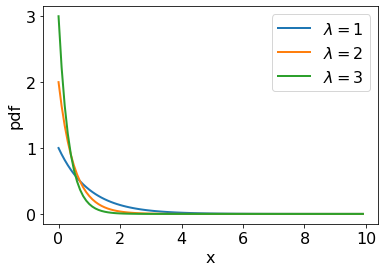

In [3]:
rvs = [expon(scale=s) for s in [1/1., 1/2., 1/3.]]
x = np.arange(0, 10, 0.1)
for i, lambda_val in enumerate([1, 2, 3]):
    plt.plot(x, rvs[i].pdf(x), lw=2, label=r'$\lambda=%s$' %lambda_val)
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')

The Cumulative Distribution Function (CDF) is given by
$$
F(x ; \lambda)=\left\{\begin{array}{ll}
1-e^{-\lambda x} & x \geq 0 \\
0 & x<0
\end{array}\right.
$$

Text(0.5, 0, 'x')

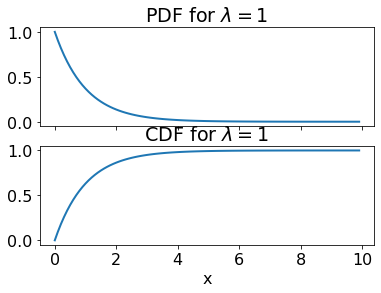

In [4]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ax[0].plot(x, expon().pdf(x), lw=2)
ax[0].set_title("PDF for $\lambda=$1")
ax[1].set_title("CDF for $\lambda=$1")
ax[1].plot(x, expon().cdf(x), lw=2,)
plt.xlabel('x')

Let us consider only $x \geq 0$.

Let $u = F^{-1}$ be the inverse of the CDF of $F$.

$$
u = 1-e^{-\lambda x} \\
1- u = e^{-\lambda x} \\
\log(1-u) = -\lambda x\\
x = -\frac{\log(1-u)}{\lambda}
$$

Let's plot the random variable (r.v.) x by generating 1000 samples and using 100 bins - and compare it to the distribution

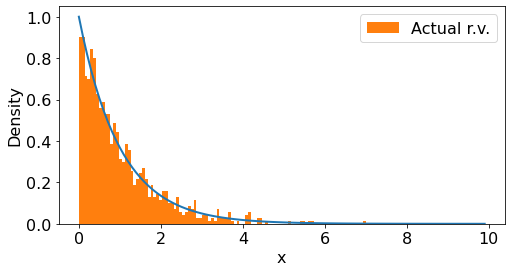

In [5]:
r = expon.rvs(size=1000)

plt.figure(figsize=(8, 4))
plt.plot(x, expon().pdf(x), lw=2)
plt.hist(r, density=True, bins=100, label="Actual r.v.")
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show() 

Let's now use the inverse transform approach by samping from a uniform distribution

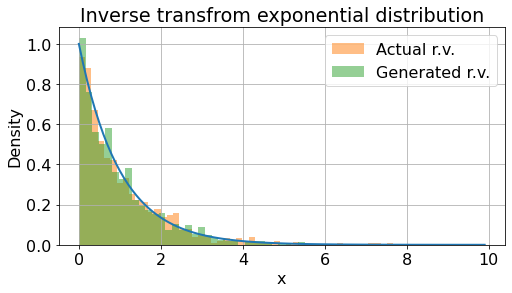

In [6]:
def exponential_inverse_trans(n=1, s=1):
    U = uniform.rvs(size=n)
    X = -np.log(1-U)/s
    actual = expon.rvs(size=n, scale=s)
    
    plt.figure(figsize=(8, 4))
    plt.plot(x, expon().pdf(x), lw=2)
    plt.hist(actual, bins=50, density=True, alpha=.5, label="Actual r.v.")
    plt.hist(X, bins=50, density=True, alpha=.5, label="Generated r.v.")

    plt.title("Inverse transfrom exponential distribution")
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid()
    plt.legend()
    plt.show()

    return X
n = 1000
s = 1
X = exponential_inverse_trans(n=n, s=s)


Note: by clicking multiple times of the code cell above, you will see that the Generated r.v. will slightly change shape. Can you think why?